yf: [ 1.50990331e-14+0.00000000e+00j  8.14784663e-05-2.59353160e-02j
  3.26248646e-04-5.19234014e-02j  7.35318641e-04-7.80174208e-02j
  1.31038124e-03-1.04271337e-01j  2.05383311e-03-1.30740323e-01j
  2.96880235e-03-1.57481202e-01j  4.05918480e-03-1.84552908e-01j
  5.32969022e-03-2.12016984e-01j  6.78589919e-03-2.39938130e-01j
  8.43433223e-03-2.68384803e-01j  1.02825328e-02-2.97429895e-01j
  1.23391664e-02-3.27151481e-01j  1.46141380e-02-3.57633690e-01j
  1.71187320e-02-3.88967682e-01j  1.98657774e-02-4.21252792e-01j
  2.28698446e-02-4.54597849e-01j  2.61474790e-02-4.89122722e-01j
  2.97174799e-02-5.24960144e-01j  3.36012343e-02-5.62257867e-01j
  3.78231180e-02-6.01181246e-01j  4.24109807e-02-6.41916323e-01j
  4.73967344e-02-6.84673579e-01j  5.28170727e-02-7.29692489e-01j
  5.87143559e-02-7.77247118e-01j  6.51377067e-02-8.27653038e-01j
  7.21443790e-02-8.81275958e-01j  7.98014803e-02-9.38542588e-01j
  8.81881627e-02-9.99954425e-01j  9.73984331e-02-1.06610547e+00j
  1.07544803e-01-1.13

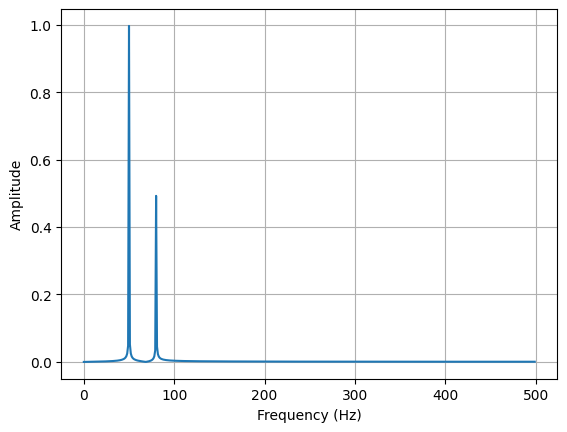

In [3]:
# gpt example
import numpy as np

# 生成一些示例数据
sample_rate = 1000  # 采样率
T = 1.0 / sample_rate  # 采样间隔
N = 1000  # 数据点数
x = np.linspace(0.0, N*T, N)  # 生成时间序列
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)  # 生成信号

# 使用FFT进行频谱分析
yf = np.fft.fft(y)
print('yf:', yf)
xf = np.fft.fftfreq(N, T)[:N//2]  # 生成频率序列，仅考虑正频率
print('xf:', xf )

# 绘制频谱
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


c:\Users\cmx\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


[0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


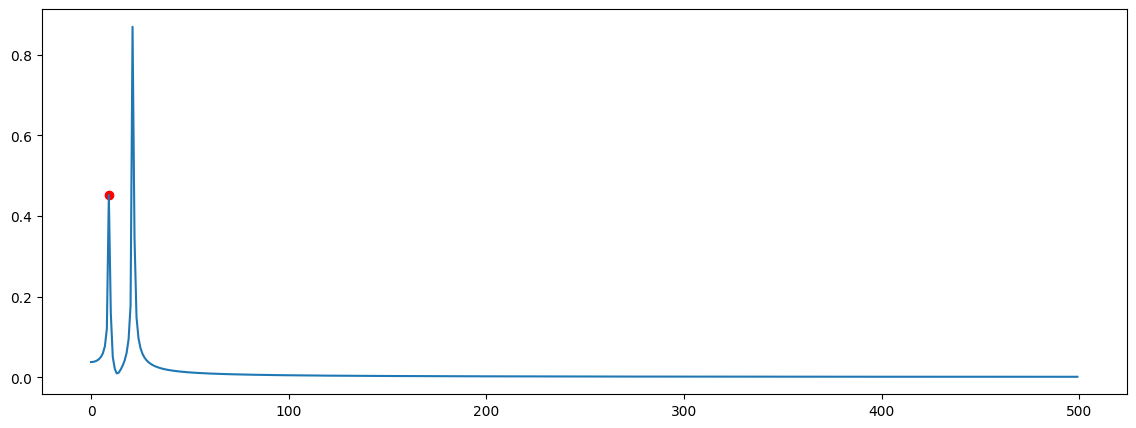

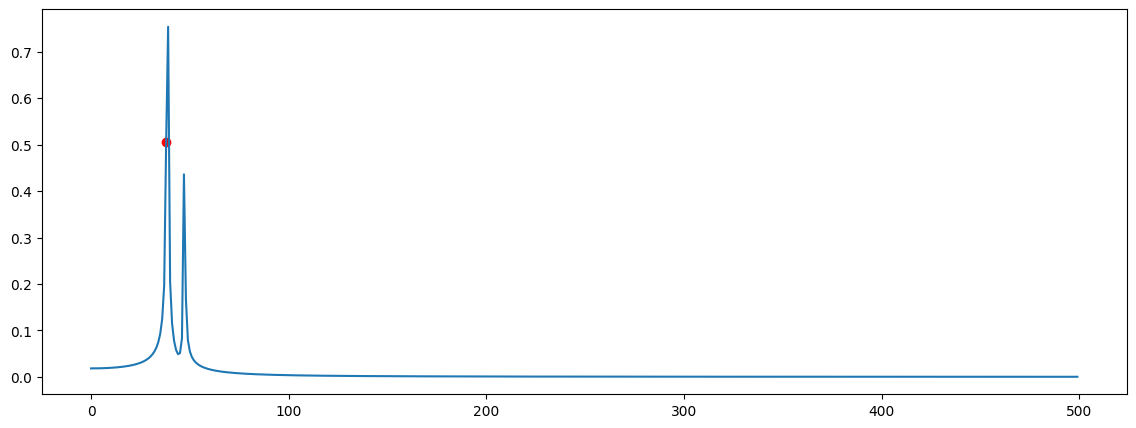

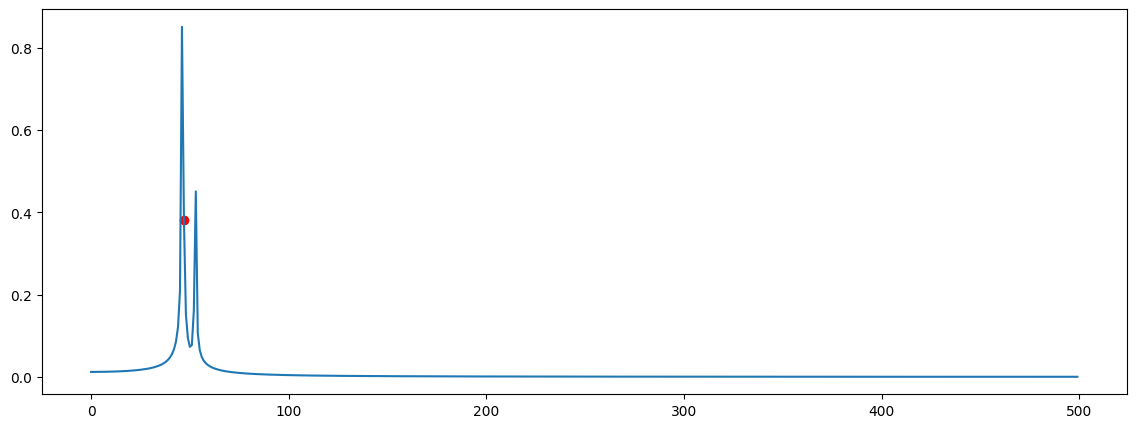

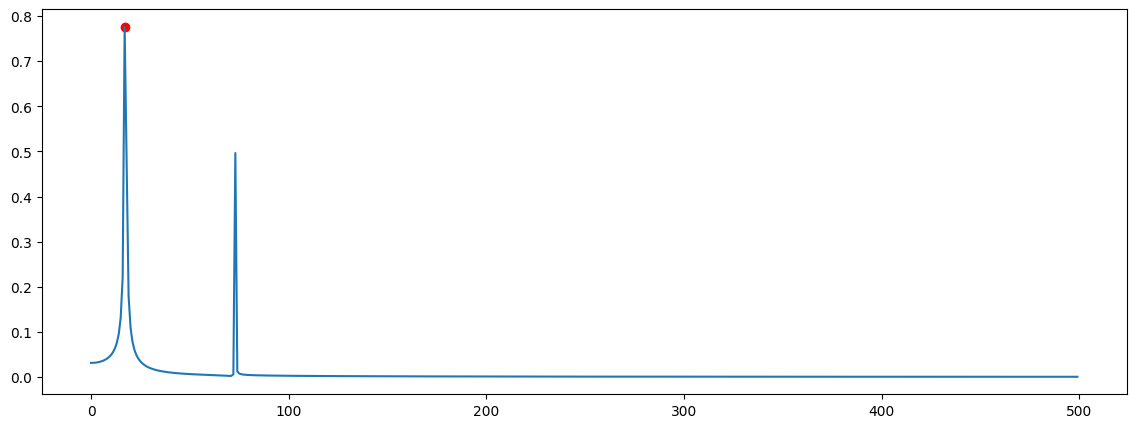

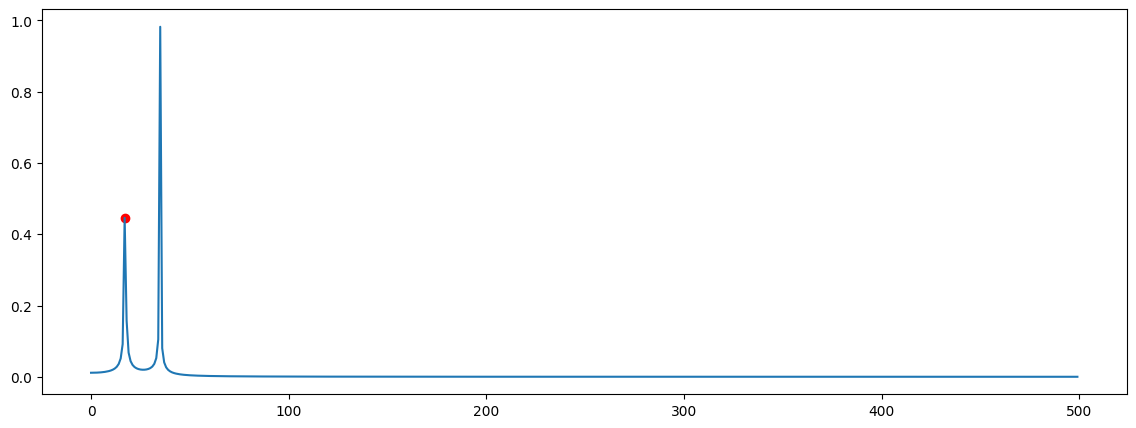

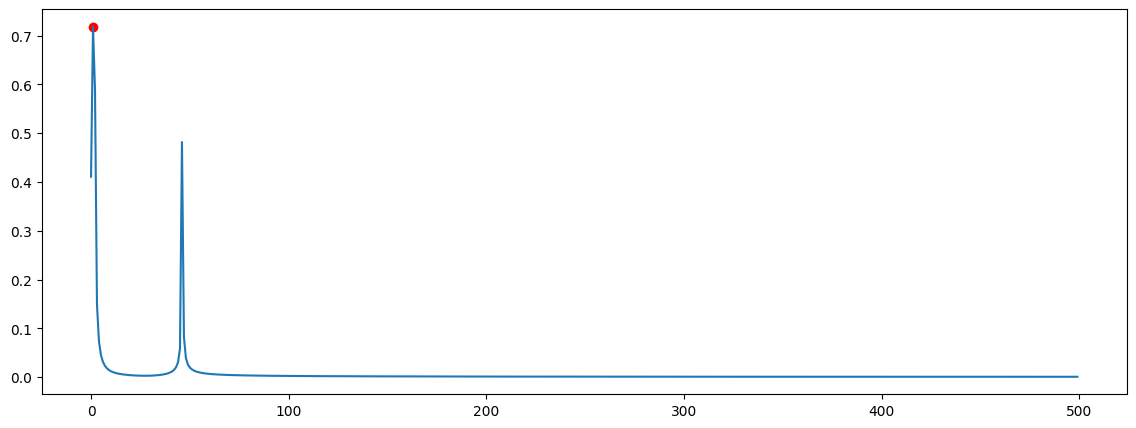

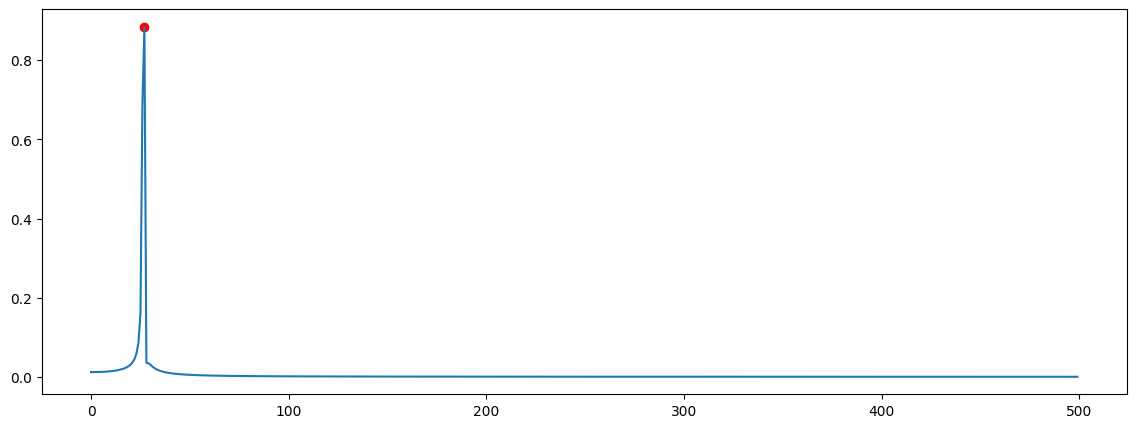

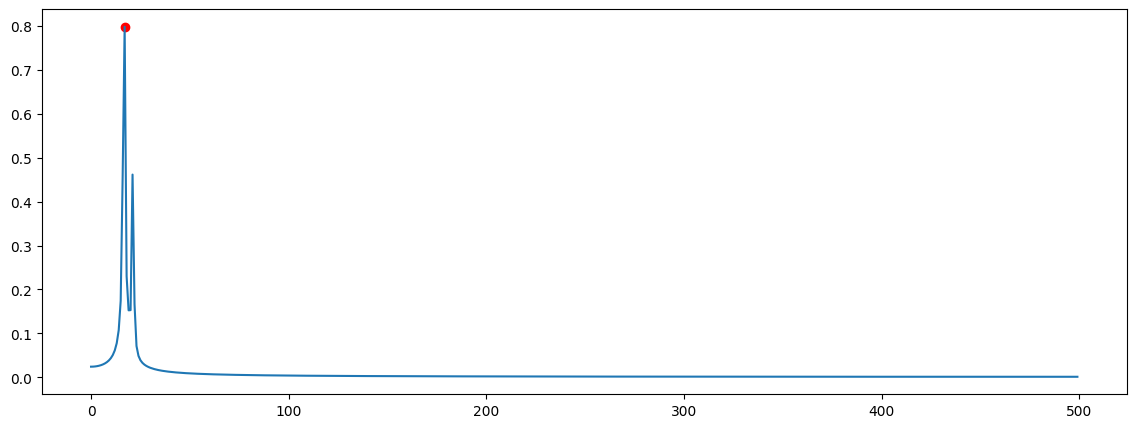

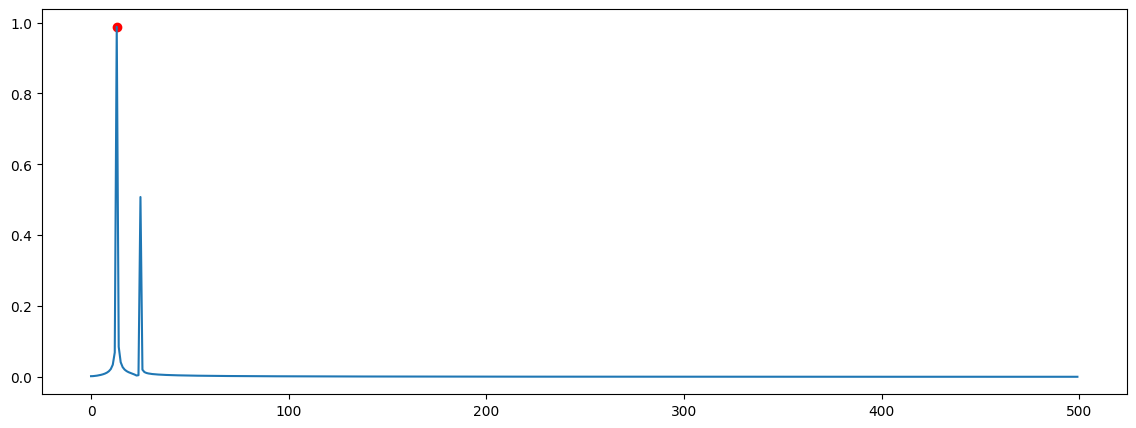

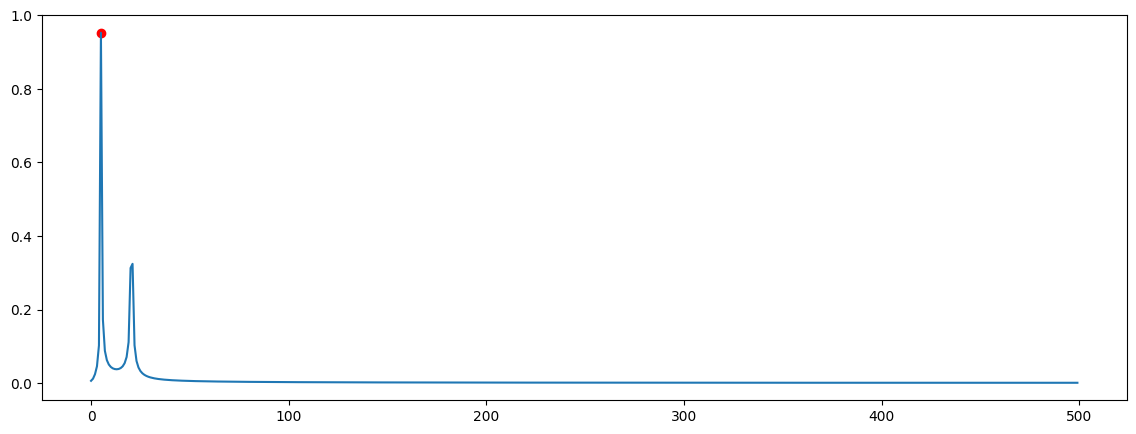

In [38]:
# 生成一批随机数据
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
rate = 1000
T = 1.0 / rate
N = 1000
x = np.linspace(0.0, N*T, N)
ys = [np.sin(50.0 * np.random.randn(1)*np.pi*x) + 0.5*np.sin(80.0 * np.random.randn(1)*np.pi*x) for i in range(1000)]

for y in ys[:10]:   
    yf = np.fft.fft(y)
    xf = np.fft.fftfreq(N, T)[:N//2]
    plt.figure(figsize=(14,5))
    new_idx,_  = find_peaks(yf[:N//2],0.5)
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.scatter(xf[new_idx[0]], 2.0/N * np.abs(yf[new_idx[0]]), color='red')
    label = np.zeros(10)
    for i in new_idx:
        label[round(i/10)] = 1
    print(label)

In [52]:
import torch
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
def get_data(n):
    # 生成一批随机时域数据和FFT后的频域数据
    rate = 1000
    T = 1.0 / rate
    N = 1000
    x = np.linspace(0.0, N*T, N)
    ys = [np.sin(50.0 * np.random.randn(1)*np.pi*x) + 0.5*np.sin(80.0 * np.random.randn(1)*np.pi*x) for i in range(n)]
    labels = []
    for  y in ys:
        yf = np.fft.fft(y)
        xf = np.fft.fftfreq(N, T)[:N//2]
        new_idx,_  = find_peaks(yf[:N//2],0.5)
        label = np.zeros(11)
        for i in new_idx:
            if i>=100:
                label[10] = 1
            else:
                label[round(i/10)] = 1
        labels.append(label)
    return ys,labels


class MyDataset(Dataset):
    def __init__(self, data):
        self.datas, self.labels = get_data(1000)
    def __len__(self):
        return len(self.datas)
    def __getitem__(self, idx):
        return self.datas[idx], self.labels[idx]
class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = torch.nn.Linear(1000, 100)
        self.fc2 = torch.nn.Linear(100, 11)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x
model = MyModel()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
dataset = MyDataset(1000)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)
for epoch in range(100):
    for i, (data, label) in tqdm(enumerate(dataloader)):
        data = torch.tensor(data).float()
        label = torch.tensor(label).float()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
    print('epoch:', epoch, 'step:', i, 'loss:', loss.item())
model.eval()
dataset = MyDataset(20)
for i in range(10):
    data, label = dataset[i]
    output = model(torch.tensor(data).float())
    print('output:', (output).tolist(), 'label:', label.tolist())

c:\Users\cmx\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
0it [00:00, ?it/s]C:\Users\cmx\AppData\Local\Temp\ipykernel_37600\1515001844.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data).float()
C:\Users\cmx\AppData\Local\Temp\ipykernel_37600\1515001844.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(label).float()
100it [00:00, 363.27it/s]


epoch: 0 step: 99 loss: 0.25787296891212463


100it [00:00, 374.84it/s]


epoch: 1 step: 99 loss: 0.2373100221157074


100it [00:00, 396.83it/s]


epoch: 2 step: 99 loss: 0.2052505910396576


100it [00:00, 386.65it/s]


epoch: 3 step: 99 loss: 0.08502285182476044


100it [00:00, 348.48it/s]


epoch: 4 step: 99 loss: 0.12963305413722992


100it [00:00, 381.13it/s]


epoch: 5 step: 99 loss: 0.053915273398160934


100it [00:00, 257.85it/s]


epoch: 6 step: 99 loss: 0.08345535397529602


100it [00:00, 379.81it/s]


epoch: 7 step: 99 loss: 0.0838199034333229


100it [00:00, 386.35it/s]


epoch: 8 step: 99 loss: 0.05452125892043114


100it [00:00, 378.79it/s]


epoch: 9 step: 99 loss: 0.05439227819442749


100it [00:00, 397.47it/s]


epoch: 10 step: 99 loss: 0.022501347586512566


100it [00:00, 385.23it/s]


epoch: 11 step: 99 loss: 0.03183668106794357


100it [00:00, 376.70it/s]


epoch: 12 step: 99 loss: 0.02467208169400692


100it [00:00, 390.66it/s]


epoch: 13 step: 99 loss: 0.016273921355605125


100it [00:00, 378.41it/s]


epoch: 14 step: 99 loss: 0.02337506040930748


100it [00:00, 381.68it/s]


epoch: 15 step: 99 loss: 0.010249350219964981


100it [00:00, 381.68it/s]


epoch: 16 step: 99 loss: 0.01464291661977768


100it [00:00, 382.32it/s]


epoch: 17 step: 99 loss: 0.009855315089225769


100it [00:00, 380.23it/s]


epoch: 18 step: 99 loss: 0.005802121013402939


100it [00:00, 246.17it/s]


epoch: 19 step: 99 loss: 0.007026667706668377


100it [00:00, 345.51it/s]


epoch: 20 step: 99 loss: 0.006144597195088863


100it [00:00, 389.01it/s]


epoch: 21 step: 99 loss: 0.0041726804338395596


100it [00:00, 384.80it/s]


epoch: 22 step: 99 loss: 0.005121852271258831


100it [00:00, 406.50it/s]


epoch: 23 step: 99 loss: 0.004567360505461693


100it [00:00, 382.46it/s]


epoch: 24 step: 99 loss: 0.0053270612843334675


100it [00:00, 389.19it/s]


epoch: 25 step: 99 loss: 0.002912713447585702


100it [00:00, 389.70it/s]


epoch: 26 step: 99 loss: 0.003383224131539464


100it [00:00, 387.60it/s]


epoch: 27 step: 99 loss: 0.001609529135748744


100it [00:00, 380.79it/s]


epoch: 28 step: 99 loss: 0.0010910105193033814


100it [00:00, 373.39it/s]


epoch: 29 step: 99 loss: 0.0022523945663124323


100it [00:00, 326.16it/s]


epoch: 30 step: 99 loss: 0.0019510192796587944


100it [00:00, 258.77it/s]


epoch: 31 step: 99 loss: 0.0007550891023129225


100it [00:00, 368.14it/s]


epoch: 32 step: 99 loss: 0.0019362636376172304


100it [00:00, 383.69it/s]


epoch: 33 step: 99 loss: 0.0011976846726611257


100it [00:00, 354.61it/s]


epoch: 34 step: 99 loss: 0.0008272103150375187


100it [00:00, 394.32it/s]


epoch: 35 step: 99 loss: 0.000965026265475899


100it [00:00, 374.52it/s]


epoch: 36 step: 99 loss: 0.0013245599111542106


100it [00:00, 375.53it/s]


epoch: 37 step: 99 loss: 0.0011579791316762567


100it [00:00, 389.10it/s]


epoch: 38 step: 99 loss: 0.000770780083257705


100it [00:00, 383.69it/s]


epoch: 39 step: 99 loss: 0.0008046330767683685


100it [00:00, 383.72it/s]


epoch: 40 step: 99 loss: 0.0005518932011909783


100it [00:00, 380.23it/s]


epoch: 41 step: 99 loss: 0.0004072040319442749


100it [00:00, 257.97it/s]


epoch: 42 step: 99 loss: 0.0009102399926632643


100it [00:00, 407.17it/s]


epoch: 43 step: 99 loss: 0.0006660297513008118


100it [00:00, 356.10it/s]


epoch: 44 step: 99 loss: 0.0004095137119293213


100it [00:00, 399.74it/s]


epoch: 45 step: 99 loss: 0.0002880499232560396


100it [00:00, 358.93it/s]


epoch: 46 step: 99 loss: 0.0004336767888162285


100it [00:00, 331.12it/s]


epoch: 47 step: 99 loss: 0.00027364856214262545


100it [00:00, 362.32it/s]


epoch: 48 step: 99 loss: 0.0003009641950484365


100it [00:00, 332.64it/s]


epoch: 49 step: 99 loss: 0.00032411282882094383


100it [00:00, 355.11it/s]


epoch: 50 step: 99 loss: 0.0002907507587224245


100it [00:00, 261.20it/s]


epoch: 51 step: 99 loss: 0.00015186930249910802


100it [00:00, 317.99it/s]


epoch: 52 step: 99 loss: 0.00025483802892267704


100it [00:00, 396.28it/s]


epoch: 53 step: 99 loss: 0.00029705194174312055


100it [00:00, 332.70it/s]


epoch: 54 step: 99 loss: 0.00015875125245656818


100it [00:00, 329.21it/s]


epoch: 55 step: 99 loss: 0.00013688828039448708


100it [00:00, 350.84it/s]


epoch: 56 step: 99 loss: 0.00012827756290789694


100it [00:00, 373.30it/s]


epoch: 57 step: 99 loss: 0.00023217653506435454


100it [00:00, 390.39it/s]


epoch: 58 step: 99 loss: 0.00013343642058316618


100it [00:00, 386.71it/s]


epoch: 59 step: 99 loss: 9.302848047809675e-05


100it [00:00, 242.01it/s]


epoch: 60 step: 99 loss: 0.00013140893133822829


100it [00:00, 371.87it/s]


epoch: 61 step: 99 loss: 0.00015961450117174536


100it [00:00, 362.31it/s]


epoch: 62 step: 99 loss: 0.0001634935033507645


100it [00:00, 390.99it/s]


epoch: 63 step: 99 loss: 0.00010127512359758839


100it [00:00, 384.83it/s]


epoch: 64 step: 99 loss: 8.386625995626673e-05


100it [00:00, 381.51it/s]


epoch: 65 step: 99 loss: 0.0001072403829311952


100it [00:00, 380.58it/s]


epoch: 66 step: 99 loss: 0.00010220961848972365


100it [00:00, 402.80it/s]


epoch: 67 step: 99 loss: 0.00017415135516785085


100it [00:00, 357.11it/s]


epoch: 68 step: 99 loss: 8.433392940787598e-05


100it [00:00, 262.26it/s]


epoch: 69 step: 99 loss: 0.00016963804955594242


100it [00:00, 379.30it/s]


epoch: 70 step: 99 loss: 6.25176980975084e-05


100it [00:00, 389.70it/s]


epoch: 71 step: 99 loss: 0.00012968874943908304


100it [00:00, 393.70it/s]


epoch: 72 step: 99 loss: 0.00011289156100247055


100it [00:00, 400.51it/s]


epoch: 73 step: 99 loss: 8.139165583997965e-05


100it [00:00, 400.00it/s]


epoch: 74 step: 99 loss: 7.65520308050327e-05


100it [00:00, 392.73it/s]


epoch: 75 step: 99 loss: 6.928580114617944e-05


100it [00:00, 369.65it/s]


epoch: 76 step: 99 loss: 6.744178244844079e-05


100it [00:00, 371.11it/s]


epoch: 77 step: 99 loss: 4.942174200550653e-05


100it [00:00, 397.49it/s]


epoch: 78 step: 99 loss: 3.630525679909624e-05


100it [00:00, 263.73it/s]


epoch: 79 step: 99 loss: 4.3270782043691725e-05


100it [00:00, 392.43it/s]


epoch: 80 step: 99 loss: 7.032944267848507e-05


100it [00:00, 386.69it/s]


epoch: 81 step: 99 loss: 5.4121795983519405e-05


100it [00:00, 392.78it/s]


epoch: 82 step: 99 loss: 3.619492781581357e-05


100it [00:00, 396.78it/s]


epoch: 83 step: 99 loss: 4.59994153061416e-05


100it [00:00, 348.14it/s]


epoch: 84 step: 99 loss: 3.317660230095498e-05


100it [00:00, 328.67it/s]


epoch: 85 step: 99 loss: 3.664593896246515e-05


100it [00:00, 209.39it/s]


epoch: 86 step: 99 loss: 4.3921510950895026e-05


100it [00:00, 346.49it/s]


epoch: 87 step: 99 loss: 4.2314517486374825e-05


100it [00:00, 338.98it/s]


epoch: 88 step: 99 loss: 4.0757346141617745e-05


100it [00:00, 323.42it/s]


epoch: 89 step: 99 loss: 2.8019694582326338e-05


100it [00:00, 334.89it/s]


epoch: 90 step: 99 loss: 2.541803041822277e-05


100it [00:00, 299.89it/s]


epoch: 91 step: 99 loss: 2.441620745230466e-05


100it [00:00, 250.97it/s]


epoch: 92 step: 99 loss: 1.9915387383662164e-05


100it [00:00, 369.54it/s]


epoch: 93 step: 99 loss: 3.1835097615839913e-05


100it [00:00, 384.78it/s]


epoch: 94 step: 99 loss: 2.8114278393331915e-05


100it [00:00, 388.17it/s]


epoch: 95 step: 99 loss: 1.9918543330277316e-05


100it [00:00, 386.10it/s]


epoch: 96 step: 99 loss: 1.933216117322445e-05


100it [00:00, 375.10it/s]


epoch: 97 step: 99 loss: 1.685863026068546e-05


100it [00:00, 376.35it/s]


epoch: 98 step: 99 loss: 2.0524146748357452e-05


100it [00:00, 373.80it/s]


epoch: 99 step: 99 loss: 1.3671395208803006e-05
output: 0 label: [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
output: 1 label: [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
output: 0 label: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
output: 2 label: [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
output: 1 label: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
output: 2 label: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
output: 1 label: [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
output: 2 label: [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
output: 1 label: [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
output: 2 label: [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]


In [53]:
dataset = MyDataset(20)
for i in range(10):
    data, label = dataset[i]
    output = model(torch.tensor(data).float())
    print('output:', (output).tolist(), 'label:', label.tolist())

output: [1.0, 6.161198484733177e-08, 1.0107698926731246e-06, 0.0011774831218644977, 1.9927266503572127e-09, 2.0593252103573434e-10, 2.0120423869229853e-05, 5.584983517326059e-11, 0.0017167062032967806, 5.1440952830716924e-08, 5.043552228823798e-15] label: [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
output: [8.012749458430335e-05, 1.0, 8.68888108129795e-08, 0.0006727970321662724, 0.4117013216018677, 0.0021178084425628185, 1.3227408805858293e-13, 0.00039694225415587425, 6.347288916686011e-08, 0.00017425831174477935, 0.007320376578718424] label: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
output: [0.8386444449424744, 0.11266219615936279, 0.9999685287475586, 0.0011284917127341032, 0.0023964070715010166, 0.002313349163159728, 0.000531496771145612, 1.8645628097058164e-10, 9.408863115822896e-05, 0.0021264550741761923, 4.911589798067828e-13] label: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
output: [1.0, 1.3280650534852612e-07, 0.06414003670215607, 1.347576

c:\Users\cmx\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
